In [1]:
import scipy.io
import numpy as np
# mat = scipy.io.loadmat('binaryalphadigs.mat')

In [2]:
import matplotlib.pyplot as plt

C:\Users\32mor\AppData\Local\Temp\ipykernel_22500\2642813775.py:2: RuntimeWarning: divide by zero encountered in log
  y_s = x_s*np.log(x_s)
C:\Users\32mor\AppData\Local\Temp\ipykernel_22500\2642813775.py:2: RuntimeWarning: invalid value encountered in multiply
  y_s = x_s*np.log(x_s)


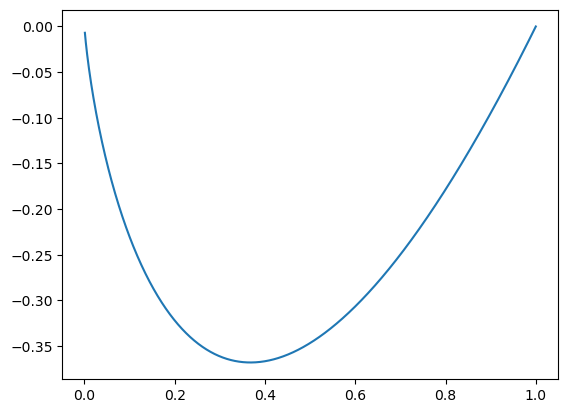

In [4]:
x_s = np.linspace(0., 1, 1000)
y_s = x_s*np.log(x_s)
plt.plot(x_s, y_s)

In [12]:
data = mat['dat']

In [13]:
data[0,1].shape

(20, 16)

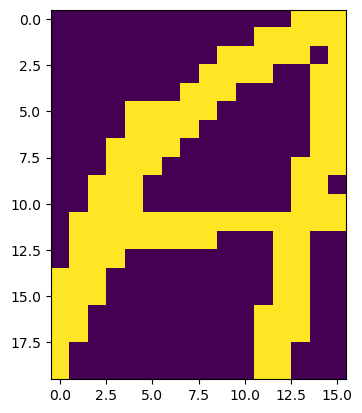

In [14]:
from matplotlib import pyplot as plt
plt.imshow(data[10][21], interpolation='nearest')
plt.show()

In [24]:
def lire_alpha_digit(caracteres:list):
    mat = scipy.io.loadmat('binaryalphadigs.mat')
    data = mat["dat"]
    NUM = 31
    if type(caracteres)==list:
        number_values = len(caracteres)
        X = np.zeros((number_values*39, 20*16))
        j = 0
        for caractere in caracteres:
            try:
                caractere = int(caractere)
                if caractere>9:
                    raise(ValueError('integer should be lower or equal than 9 '))
                position = caractere
            except:
                position = (ord(caractere)& NUM)+9
            for i in range(39):
                place = j*39 + i
                X[place,:] = data[position, i].flatten()
            j+=1
        return X          
    elif type(caracteres)==str:
        position = (ord(caracteres)& NUM)+9
        X = np.zeros((39, 20*16))
        for i in range(39):
            X[i,:] = data[position,i].flatten()
        return X
    elif type(caracteres)==int:
        if caracteres>9:
            raise(ValueError('integer should be lower or equal than 9 '))
        position = caracteres
        X = np.zeros((39, 20*16))
        for i in range(39):
            X[i,:] = data[position,i].flatten() 
        return X       
    else:
        raise(TypeError('input should be either a list, string or integer'))
    

In [22]:
lire_alpha_digit(9)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
from RBM_baseline import *

In [25]:
X = lire_alpha_digit(["a"])

In [27]:
X.shape

(39, 320)

In [28]:
rbm_test = RBM(p=320, q=100)

In [30]:
rbm_test.train_RBM(torch.tensor(X), 0.01, 32, 20)

RuntimeError: expected scalar type Double but found Float